<a href="https://colab.research.google.com/github/Yezz1n/ESAA_NOV/blob/main/ESAA_15th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측

#### LinearRegression 클래스 -Ordinary Least Squares

LinearRegression 클래스는 예측값과 실체값의 RSS를 최소화해서 OLS 추청 방식으로 구현한 클래스
- fit() 매서드로 X,y배열 입력 받으면 회귀계수인 W를 coef_ 속성에 저장
- 입력 파라미터
  - fit_intercept:불린 값, 디폴트 True
    - intercept값을 계산할 것인지 말지를 지정
    - False 지정시 intercept가 사용되지 않고 0으로 지정
  - normalize: 불린 값, 디폴트 False
    - fit_intercept가 False 인 경우에는 이 파라미터가 무시
    - True 지정시 회귀 수행 전 입력 데이터 세트를 정규화
- 속성
  - coef_:fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성
   - shape (Target 값 개수, 피처 개수)
  - intercept_: intercept 값

- OLS 회귀 계수 계산은 입력 피처의 독립성에 많은 형향을 받음
 - 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감=다중공선성 문제
 - 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
 - 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA 통해 차원 축소 수행 고려



```
class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)
```



> ### 회귀 평가 지표
: 실제값과 회귀 예측값의 차이값을 기반으로 한 지표가 중심

- MAE: 실제값과 예측값의 차이 절댓값으로 변환
$$MAE= \frac{1}{n}*\sum_{i=1}^{n} \ |Y_{i}-Yhat_{i}|$$ 

- MSE: 실제값과 예측값의 차이를 제곱해 평균
$$MSE= \frac{1}{n} *\sum_{i=1}^{n} \ (Y_{i}-Yhat_{i})^2$$ 
-RMSE: MSE는 오류 값의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE
$$RMSE= \sqrt{\frac{1}{n} *\sum_{i=1}^{n} \ (Y_{i}-Yhat_{i})^2}$$ 
- R^2= 분산 기반으로 예측 성능 평가.1에 가까울수록 예측 정확도가 높다
$$ R^2=\frac{예측값 Variance}{실제값 Variance}$$



| 평가 방법  | 사이킷런 평가 지표 API  | scoring 함수 적용값  |   |   |
|---|---|---|---|---|
| MAE  | metrics.mean_absolute_error   | 'neg_mean_absolute_error'  |   |   |
| MSE  | metrics.mean_squared_error  |  'neg_mean_squared_error' |   |   |
| R^2 | metrics.r2_score  |  'r2' |   |   |

- scoring 함수 적용 값은 cross_val_score이나 GridSearchCV에 평가 시 사용되는 파라미터 적용 값

In [ ]:
#LinearRegression 클래스 이용해 선형 회귀 모델 생성
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#Boston 데이터 세트 로드
boston=load_boston()

#boston 데이터 세트 DataFrame 변환
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격. 이를 price 칼럼으로 DataFrame에 추가
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()


Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


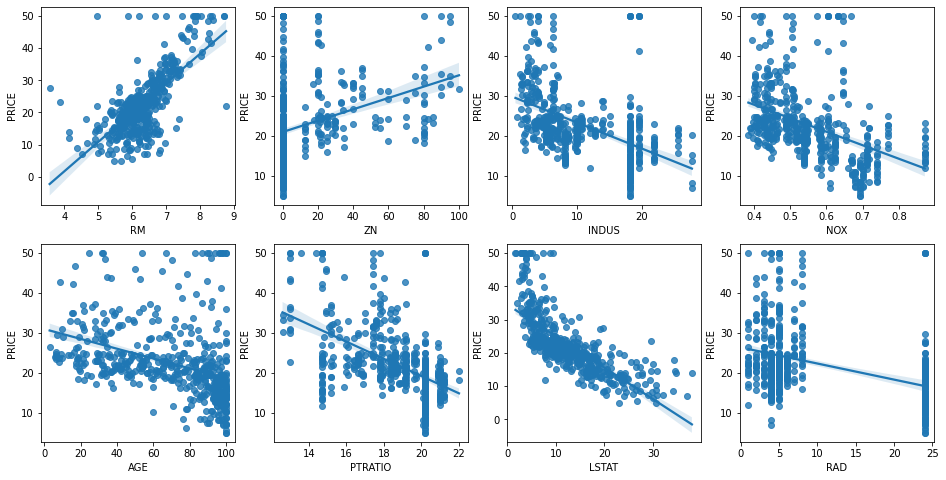

In [ ]:
#각 칼럼이 회귀 결과에 미치는 영향 어느 정도인지 ㅎ시각화하기
#2개의 행과 4개의 열을 가진 subplot를 이용 axs는 4x2개의 ax를 가짐
fig,axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  #사본의 regplot를 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])
#다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타냄
#RM은 양 방향의 선형성이 가장 크다
#LSTAT은 음 방향의 선형성이 가장 크다

In [ ]:
#LienarRegression 클래스 이용해 보스턴 주택 가격의 회귀모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)

y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297,RMSE:4.159
Variance score:0.757


In [ ]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))


절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series 로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
#교차 검증으로 MSE와 RMSE를 측정
from sklearn.model_selection import cross_val_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

#cross_val_score() 로 5폴드 세트로 MSE 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829
